<a href="https://colab.research.google.com/github/nastyaivt/MO/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант 11: y = (3*x1) / (1 - e^(-x2))


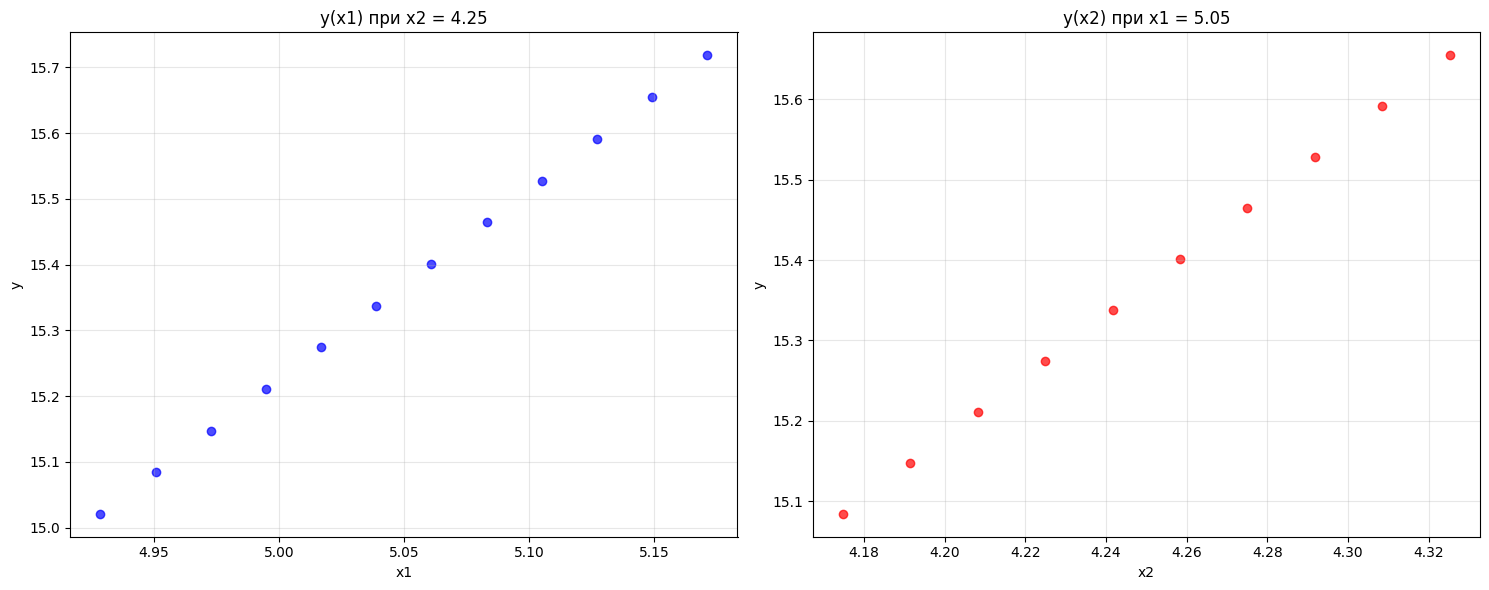


Статистика по столбцам:
Столбец x1:
  Среднее значение: 5.0500
  Минимальное значение: 0.1000
  Максимальное значение: 10.0000
------------------------------
Столбец x2:
  Среднее значение: 4.2500
  Минимальное значение: 0.5000
  Максимальное значение: 8.0000
------------------------------
Столбец y:
  Среднее значение: 15.5748
  Минимальное значение: 0.7624
  Максимальное значение: 30.0101
------------------------------

Отфильтрованные данные сохранены в 'lab2_filtered_data.csv'
Исходное количество строк: 450
Отфильтрованное количество строк: 225


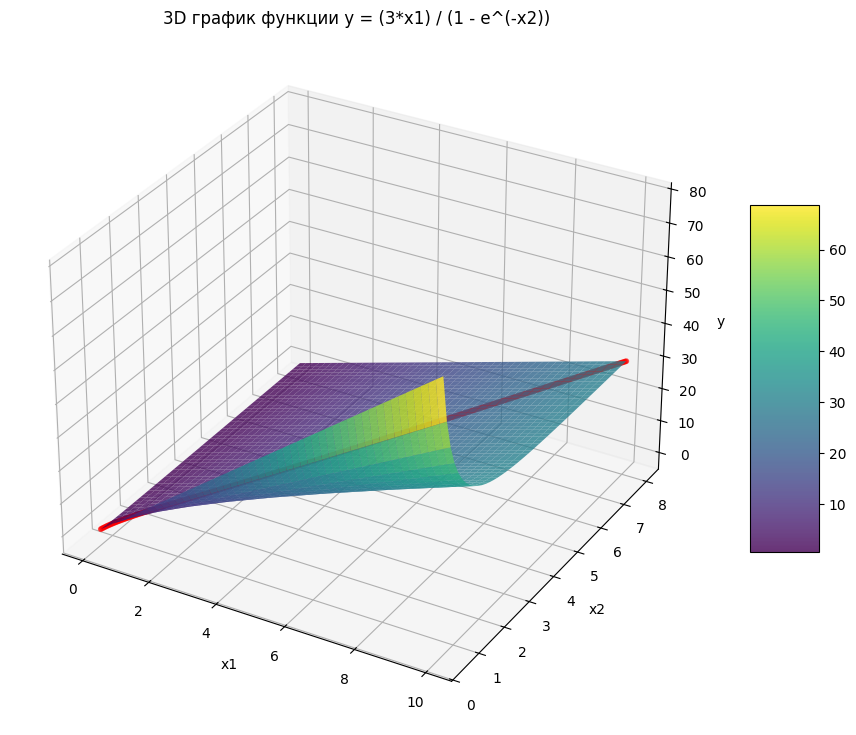

Созданные файлы:
- lab2_data.csv (исходные данные)
- lab2_filtered_data.csv (отфильтрованные данные)
- lab2_graphs.png (2D графики)
- lab2_3d_graph.png (3D график)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 1. Генерация CSV файла
def generate_data():
    # Генерация данных с использованием linspace
    x1 = np.linspace(0.1, 10, 450)  # избегаем 0 в знаменателе
    x2 = np.linspace(0.5, 8, 450)  # избегаем 0 в знаменателе

    # Функция по варианту 11: y = (3*x1) / (1 - e^(-x2))
    y = (3 * x1) / (1 - np.exp(-x2))

    # Создание DataFrame
    df = pd.DataFrame({
        'x1': x1,
        'x2': x2,
        'y': y
    })

    # Сохранение в CSV файл
    df.to_csv('lab2_data.csv', index=False)
    return df


# 2. Построение графиков
def plot_graphs(df):
    # Постоянные значения для графиков
    x2_const = df['x2'].median()  # медианное значение x2
    x1_const = df['x1'].median()  # медианное значение x1

    # Фигура с двумя подграфиками
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # График y(x1) при постоянном x2
    df_const_x2 = df[np.abs(df['x2'] - x2_const) < 0.1]  # значения близкие к константе
    if len(df_const_x2) > 0:
        ax1.scatter(df_const_x2['x1'], df_const_x2['y'], alpha=0.7, color='blue')
        ax1.set_xlabel('x1')
        ax1.set_ylabel('y')
        ax1.set_title(f'y(x1) при x2 = {x2_const:.2f}')
        ax1.grid(True, alpha=0.3)

    # График y(x2) при постоянном x1
    df_const_x1 = df[np.abs(df['x1'] - x1_const) < 0.1]  # значения близкие к константе
    if len(df_const_x1) > 0:
        ax2.scatter(df_const_x1['x2'], df_const_x1['y'], alpha=0.7, color='red')
        ax2.set_xlabel('x2')
        ax2.set_ylabel('y')
        ax2.set_title(f'y(x2) при x1 = {x1_const:.2f}')
        ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('lab2_graphs.png', dpi=300)
    plt.show()


# 3. Статистика по столбцам
def calculate_statistics(df):
    print("\nСтатистика по столбцам:")
    print("=" * 50)

    for column in df.columns:
        print(f"Столбец {column}:")
        print(f"  Среднее значение: {df[column].mean():.4f}")
        print(f"  Минимальное значение: {df[column].min():.4f}")
        print(f"  Максимальное значение: {df[column].max():.4f}")
        print("-" * 30)


# 4. Фильтрация и сохранение в новый CSV
def filter_and_save(df):
    # Условие фильтрации: x1 < среднее(x1) ИЛИ x2 < среднее(x2)
    condition = (df['x1'] < df['x1'].mean()) | (df['x2'] < df['x2'].mean())
    filtered_df = df[condition]

    # Сохранение отфильтрованных данных
    filtered_df.to_csv('lab2_filtered_data.csv', index=False)
    print(f"\nОтфильтрованные данные сохранены в 'lab2_filtered_data.csv'")
    print(f"Исходное количество строк: {len(df)}")
    print(f"Отфильтрованное количество строк: {len(filtered_df)}")

    return filtered_df


# 5. Построение 3D графика
def plot_3d_graph(df):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    # Создание сетки для более гладкого графика
    x1_vals = np.linspace(df['x1'].min(), df['x1'].max(), 50)
    x2_vals = np.linspace(df['x2'].min(), df['x2'].max(), 50)
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    Y = (3 * X1) / (1 - np.exp(-X2))

    # Построение поверхности
    surf = ax.plot_surface(X1, X2, Y, cmap='viridis', alpha=0.8)

    # Добавление точек исходных данных
    ax.scatter(df['x1'], df['x2'], df['y'], c='red', alpha=0.6, s=10)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title('3D график функции y = (3*x1) / (1 - e^(-x2))')

    # Добавление цветовой шкалы
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

    plt.savefig('lab2_3d_graph.png', dpi=300)
    plt.show()


# Основная функция
def main():
    print("Вариант 11: y = (3*x1) / (1 - e^(-x2))")
    print("=" * 60)

    # 1. Генерация данных
    df = generate_data()

    # 2. Построение графиков
    plot_graphs(df)

    # 3. Вывод статистики
    calculate_statistics(df)

    # 4. Фильтрация данных
    filtered_df = filter_and_save(df)

    # 5. Построение 3D графика
    plot_3d_graph(df)

    print("Созданные файлы:")
    print("- lab2_data.csv (исходные данные)")
    print("- lab2_filtered_data.csv (отфильтрованные данные)")
    print("- lab2_graphs.png (2D графики)")
    print("- lab2_3d_graph.png (3D график)")


if __name__ == "__main__":
    main()